In [1]:
from fastai2.vision.all import *

In [2]:
!ls

Untitled.ipynb        test.csv              train.csv
sample_submission.csv test_images           train_images


In [3]:
pwd

'/Users/harish3110/Desktop/aptos2019-blindness-detection'

In [4]:
path = Path('/Users/harish3110/Desktop/aptos2019-blindness-detection')
Path.BASE_PATH = path
path.ls()

(#8) [Path('test_images'),Path('.DS_Store'),Path('Untitled.ipynb'),Path('test.csv'),Path('train.csv'),Path('.ipynb_checkpoints'),Path('train_images'),Path('sample_submission.csv')]

In [5]:
files = get_image_files(path)
files

(#5590) [Path('test_images/ee544d980b5e.png'),Path('test_images/0d1610cda7fc.png'),Path('test_images/71eba9a97184.png'),Path('test_images/61cd9c25c7d3.png'),Path('test_images/63826c56eeac.png'),Path('test_images/d5f7be34df0d.png'),Path('test_images/d0ee299b99ca.png'),Path('test_images/354a0e7a60e2.png'),Path('test_images/8cbefbaed16e.png'),Path('test_images/74350fe494ba.png')...]

In [6]:
train = pd.read_csv(path/'train.csv')
train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [7]:
len(train)

3662

In [8]:
train['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

In [9]:
test = pd.read_csv(path/'test.csv')
test.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [10]:
len(test)

1928

In [29]:
dblock = DataBlock(
    get_x=ColReader('id_code', pref=path/'train_images', suff='.png'),
    get_y=ColReader('diagnosis'))

dsets = dblock.datasets(train)
dsets.train[0]

('/Users/harish3110/Desktop/aptos2019-blindness-detection/train_images/e5197d77ec68.png',
 0)

In [25]:
item_tfms=Resize(460),
batch_tfms=aug_transforms(size=224, min_scale=0.75)

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=ColReader('id_code', pref=path/'train_images', suff='.png'),
    get_y=ColReader('diagnosis'), 
    splitter=RandomSplitter(seed=42),
    item_tfms = item_tfms,
    batch_tfms = batch_tfms
)

dls = dblock.dataloaders(train) 

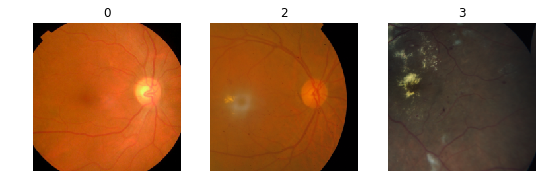

In [26]:
dls.show_batch(max_n=3, rows=1)

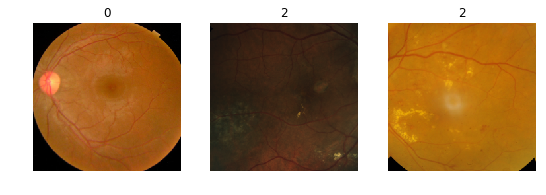

In [24]:
# Another method by using the convenience function
dls = ImageDataLoaders.from_df(train, path/'train_images', suff='.png', item_tfms=item_tfms, batch_tfms=batch_tfms)
dls.show_batch(max_n=3, rows=1)